In [1]:
import numpy as np
from dynesty import DynamicNestedSampler
import matplotlib.pyplot as plt

In [2]:
ndim = 4
dsampler = DynamicNestedSampler.restore('data/dynesty_DMnF_dtau.save')
results = dsampler.results

In [3]:
# Print out a summary of the results.
results.summary()

Summary
niter: 10278
ncall: 126146
eff(%):  6.146
logz: -488.920 +/-  0.075


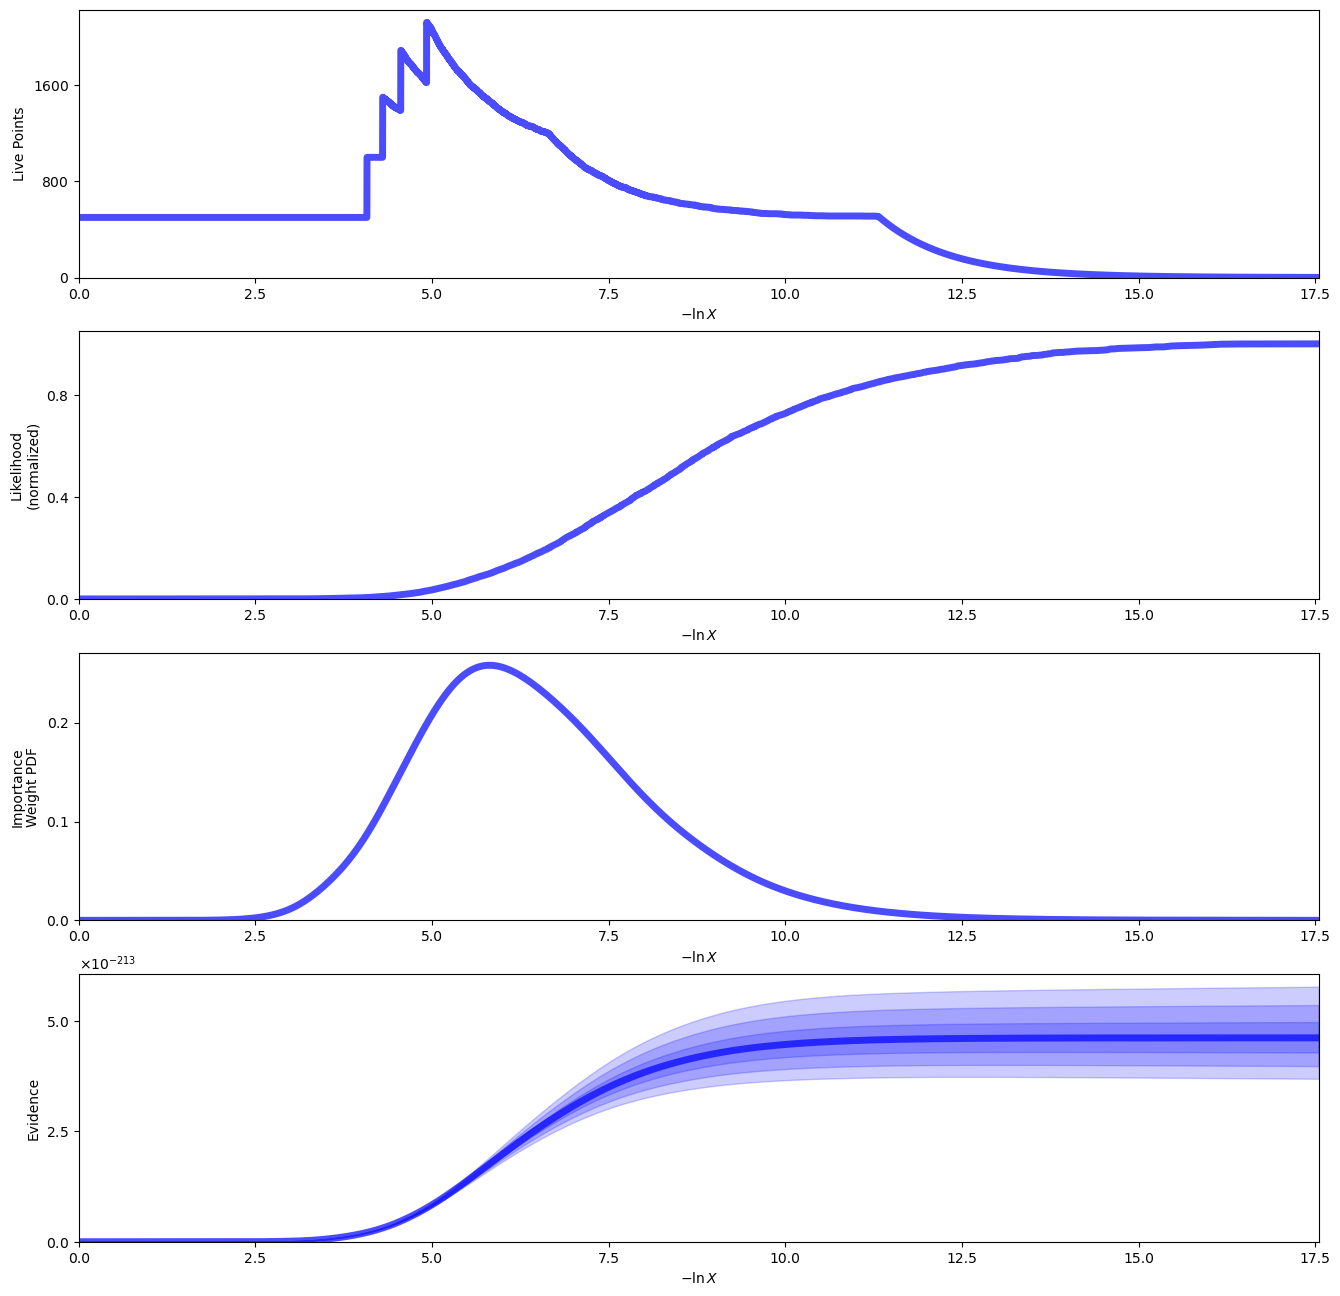

In [4]:
from dynestymod import plotting as dyplot
lnz_truth = ndim * -np.log(2 * 10.)  # analytic evidence solution
fig, axes = dyplot.runplot(results, lnz_truth=lnz_truth)  # summary (run) plot

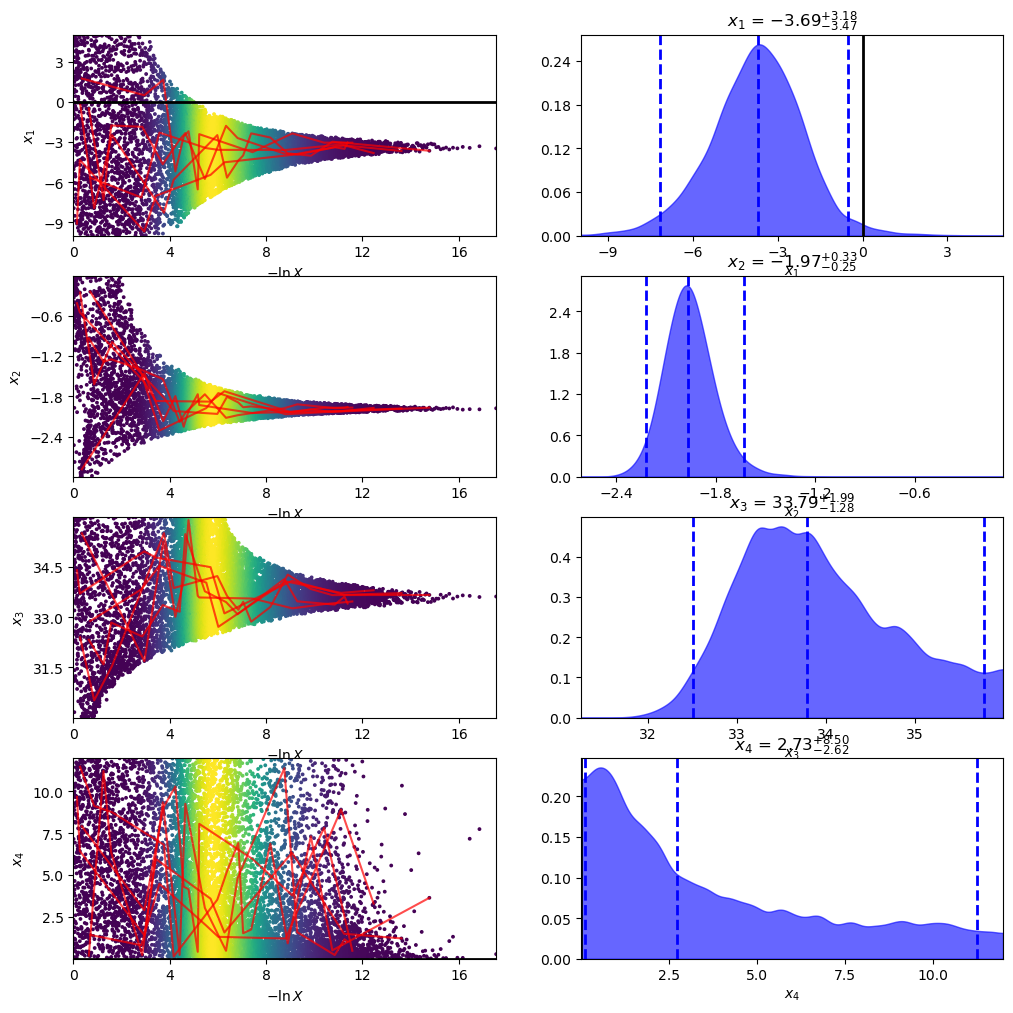

In [5]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

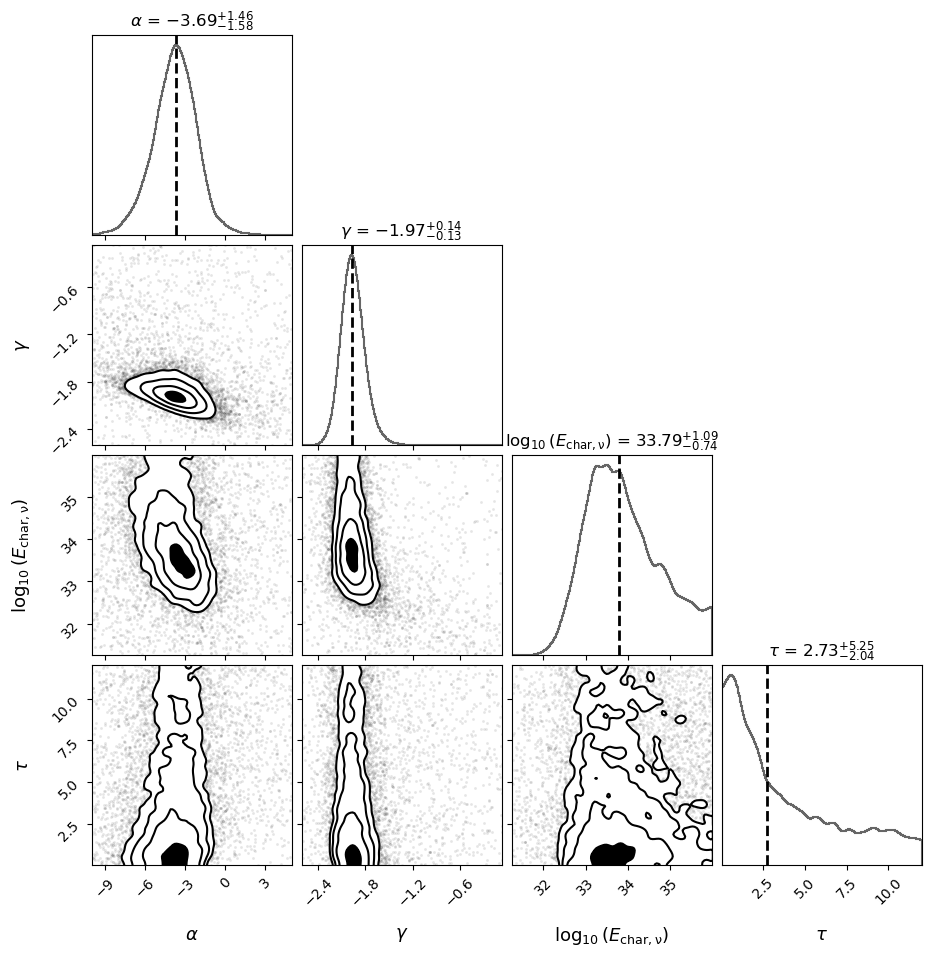

In [6]:
fg, ax =  dyplot.cornerplot(results, show_titles=True, quantiles=(0.5,), title_quantiles=(0.16,0.5,0.84), smooth=0.02,
                            labels=[r"$\alpha$", r"$\gamma$", r"$\log_{10}(E_{\rm char, \nu})$", r"$\tau$"],
                            hist_kwargs={'histtype':'step', 'edgecolor':'k', 'linewidth':1.5},
                            hist2d_kwargs={'plot_datapoints':True}, label_kwargs={'fontsize': 13})

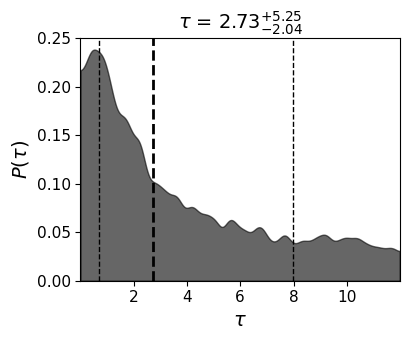

In [7]:
fig, ax = dyplot.posteriorplot(results, dims=[3], post_density=True, labels=[r"$\tau$"], label_kwargs={'fontsize': 14}, show_titles=True, title_kwargs={'fontsize': 14}, max_n_ticks=6, kde=False)
fig.set_size_inches(4.2,3.5)
ax[0][0].tick_params(axis='both', which='major', labelsize=11)
ax[0][0].set_ylabel(r"$P(\tau$)", fontsize=14)
plt.tight_layout()
plt.show()